In [ ]:
from datasets import load_dataset
from skimage import color
import torch

# Eliminar el caché de datasets
dataset = load_dataset("MichaelP84/manga-colorization-dataset", split="train", data_dir="data").with_format("torch")

def rgb2lab(x):
        if x["color_image"].dim() == 3:
            image = x["color_image"].permute(1, 2, 0)
            image = color.rgb2lab(image)
            image = torch.tensor(image).permute(2, 0, 1)[1:]
        else:
            image = x["color_image"].permute(0, 2, 3, 1)
            image = color.rgb2lab(image)
            image = torch.tensor(image).permute(0, 3, 1, 2)[:, 1:]
        return {"color_image": image, "bw_image": x["bw_image"]}

dataset = dataset.map(rgb2lab)

Resolving data files:   0%|          | 0/43 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/11920 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/36 [00:00<?, ?it/s]

Map:   0%|          | 0/11920 [00:00<?, ? examples/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1024, 1024, 3)


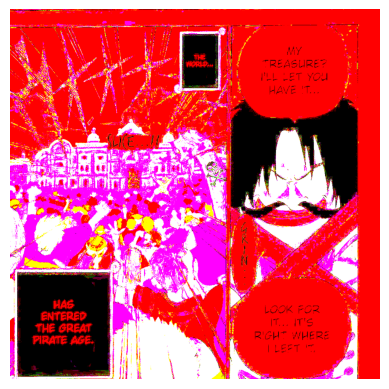

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def show_image_from_path(path):
    image_lab = color.rgb2lab(path)
    print(image_lab.shape)
    show_image(image_lab)

show_image_from_path(ds[0]['color_image'].permute(1, 2, 0))
